Homework Week 5

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as sp_la
import scipy as sp

In [146]:
data = np.array(np.genfromtxt('data/SeoulBikeData.csv', delimiter=',', skip_header=1, dtype=float, encoding="utf-8", usecols=[1,2,3,4,5,6,7,8,9,10]))  
columns = ["Rented Bike Count","Hour","Temperature(C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(C)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"]

In [147]:
# The first step is to make that dataset big. So make sure each data point is copied 100 times. This should not change the *output* of the regressions (the models that are fit). 
# This week you will work with the same dataset as last week. The first step is to make that dataset big. So make sure each data point is copied 100 times. This should not change the *output* of the regressions (the models that are fit). To do this: once you have loaded the data (which is already ordered by time), split it into 80% train and 20% test, then get the big copy of train like this:
# np.vstack([train]*100)

# Split data into train and test sets
train_size = int(0.8 * len(data))
train = data[:train_size]
test = data[train_size:]

# Get big copy of train
train_big = np.vstack([train] * 100)
# Printing the shape of train and train_big
print(train.shape, train_big.shape)

(7008, 10) (700800, 10)


In [148]:
def makePoly(X, poly):
    n_samples, n_features = X.shape
    A = np.zeros([n_samples, n_features * poly + 1])
    A[:, 0] = 1
    for i in range(n_features):
        for j in range(1, poly+1):
            A[:, i*poly + j] = np.squeeze(X[:, i]**j)
    print(getSummaryStatistics(A))
    print(getShapeType(A))
    return A
    
def fit_poly(data, independent, dependent, poly):
    # These are our independent variables
    X = data[:, independent]

    # We add a column of 1s for the intercept
    A = makePoly(X, poly)

    # This is the dependent variable 
    y = data[:, dependent]

    # This is the regression coefficients that were fit, plus some other results
    c, res, _, _ = sp.linalg.lstsq(A, y)
    return c

def predict_poly(data, independent, poly, c):
    # These are our independent variables
    X = data[:, independent]

    # We add a column of 1s for the intercept
    A = makePoly(X, poly)

    return np.dot(A, c)


def fit(data, independent, dependent):
    # These are our independent variable(s)
    x = data[np.ix_(np.arange(data.shape[0]), independent)]
    print(getSummaryStatistics(x))
    print(getShapeType(x))

    # We add a column of 1s for the intercept
    A = np.hstack((np.array([np.ones(x.shape[0])]).T, x))
    print(getSummaryStatistics(A))
    print(getShapeType(A))

    # This is the dependent variable 
    y = data[:, dependent]
    print(getSummaryStatistics(y))
    print(getShapeType(y))

    # This is the regression coefficients that were fit, plus some other results
    c, res, _, _ = sp_la.lstsq(A, y)
    return c

def predict(data, independent, c):
    # These are our independent variable(s)
    x = data[np.ix_(np.arange(data.shape[0]), independent)]
    print(getSummaryStatistics(x))
    print(getShapeType(x))

    # We add a column of 1s for the intercept
    A = np.hstack((np.array([np.ones(x.shape[0])]).T, x))
    print(getSummaryStatistics(A))
    print(getShapeType(A))

    return np.dot(A, c)

def getSummaryStatistics(data):
    return np.array([data.max(axis=0), data.min(axis=0), data.mean(axis=0, dtype=int)])

def getShapeType(data):
    return (data.shape, data.dtype)

In [149]:
%%time
# How long does it take to fit a linear regression model on the bike sharing*100 data, with dependent variable the last column and independent variable the hour of the day, using least squares?
c = fit(train_big, [2], 9)


[[ 39.4]
 [-17.8]
 [ 12. ]]
((700800, 1), dtype('float64'))
[[  1.   39.4]
 [  1.  -17.8]
 [  1.   12. ]]
((700800, 2), dtype('float64'))
[5.1 0.  0. ]
((700800,), dtype('float64'))
CPU times: user 184 ms, sys: 32.9 ms, total: 217 ms
Wall time: 224 ms


In [150]:
%%time
# How long does it take to fit a multiple linear regression model on the bike sharing*100 data, with dependent variable the last column and independent variables all the others, using least squares?

# Exclude the column with the dependent variable
independent = list(range(len(columns) - 1))

# Fit the multiple linear regression model
c = fit(train_big, independent, 9)


[[ 3.556e+03  2.300e+01  3.940e+01  9.800e+01  7.400e+00  2.000e+03
   2.720e+01  3.520e+00  3.500e+01]
 [ 0.000e+00  0.000e+00 -1.780e+01  0.000e+00  0.000e+00  2.700e+01
  -3.060e+01  0.000e+00  0.000e+00]
 [ 6.910e+02  1.100e+01  1.200e+01  5.800e+01  1.000e+00  1.420e+03
   4.000e+00  0.000e+00  0.000e+00]]
((700800, 9), dtype('float64'))
[[ 1.000e+00  3.556e+03  2.300e+01  3.940e+01  9.800e+01  7.400e+00
   2.000e+03  2.720e+01  3.520e+00  3.500e+01]
 [ 1.000e+00  0.000e+00  0.000e+00 -1.780e+01  0.000e+00  0.000e+00
   2.700e+01 -3.060e+01  0.000e+00  0.000e+00]
 [ 1.000e+00  6.910e+02  1.100e+01  1.200e+01  5.800e+01  1.000e+00
   1.420e+03  4.000e+00  0.000e+00  0.000e+00]]
((700800, 10), dtype('float64'))
[5.1 0.  0. ]
((700800,), dtype('float64'))
CPU times: user 925 ms, sys: 121 ms, total: 1.05 s
Wall time: 938 ms


In [151]:
def plotxyyhat(x, y, m, b):
    plt.plot(x, y, 'o', label='data')
    yhat = m*x + b
    plt.plot(x, yhat, label='least squares fit, $y = mx + b$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(framealpha=1, shadow=True)
    plt.grid(alpha=0.25)
    plt.show()

[[ 3.154e+03  2.300e+01  2.660e+01  9.700e+01  5.700e+00  2.000e+03
   1.810e+01  2.930e+00  1.800e+01]
 [ 0.000e+00  0.000e+00 -3.000e+00  1.300e+01  0.000e+00  3.300e+01
  -1.900e+01  0.000e+00  0.000e+00]
 [ 7.560e+02  1.100e+01  1.100e+01  5.800e+01  1.000e+00  1.504e+03
   2.000e+00  0.000e+00  0.000e+00]]
((1752, 9), dtype('float64'))
[[ 1.000e+00  3.154e+03  2.300e+01  2.660e+01  9.700e+01  5.700e+00
   2.000e+03  1.810e+01  2.930e+00  1.800e+01]
 [ 1.000e+00  0.000e+00  0.000e+00 -3.000e+00  1.300e+01  0.000e+00
   3.300e+01 -1.900e+01  0.000e+00  0.000e+00]
 [ 1.000e+00  7.560e+02  1.100e+01  1.100e+01  5.800e+01  1.000e+00
   1.504e+03  2.000e+00  0.000e+00  0.000e+00]]
((1752, 10), dtype('float64'))


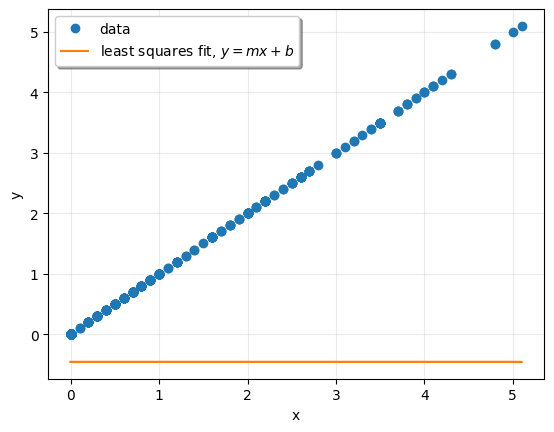

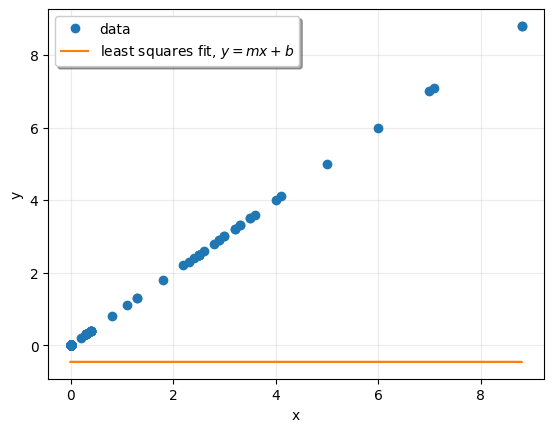

In [152]:
yhat = predict(test, independent, c)
plotxyyhat(train[:, len(independent)], train[:, 9], c[1], c[0])
plotxyyhat(test[:, len(independent)], test[:, 9], c[1], c[0])

In [153]:
%%time
c_poly = fit_poly(train_big, [0, 1, 2, 3, 4, 5, 6, 7, 8], 9, 3)


[[ 1.00000000e+00  3.55600000e+03  1.26451360e+07  4.49661036e+10
   2.30000000e+01  5.29000000e+02  1.21670000e+04  3.94000000e+01
   1.55236000e+03  6.11629840e+04  9.80000000e+01  9.60400000e+03
   9.41192000e+05  7.40000000e+00  5.47600000e+01  4.05224000e+02
   2.00000000e+03  4.00000000e+06  8.00000000e+09  2.72000000e+01
   9.36360000e+02  2.01236480e+04  3.52000000e+00  1.23904000e+01
   4.36142080e+01  3.50000000e+01  1.22500000e+03  4.28750000e+04]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.78000000e+01
   0.00000000e+00 -5.63975200e+03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.70000000e+01  7.29000000e+02  1.96830000e+04 -3.06000000e+01
   0.00000000e+00 -2.86526160e+04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  6.91000000e+02  9.03242000e+05  1.56273715e+09
   1.100